<a href="https://colab.research.google.com/github/Shamiul-693/Intrusion-Detection-System-Using-Machine-Learning-CIC-IDS--2017-dataset-/blob/main/Intrusion_Detection_System_Using_Machine_Learning_(CIC_IDS_2017).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
# tensorflow
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, Flatten, Concatenate, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
Friday_WorkingHours_Afternoon_DDos            = pd.read_csv("/content/drive/MyDrive/Intrusion Detection System Using  Machine Learning   Network Intrusion dataset(CIC-IDS- 2017)/data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
Friday_WorkingHours_Afternoon_PortScan        = pd.read_csv("/content/drive/MyDrive/Intrusion Detection System Using  Machine Learning   Network Intrusion dataset(CIC-IDS- 2017)/data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
Friday_WorkingHours_Morning                   = pd.read_csv("/content/drive/MyDrive/Intrusion Detection System Using  Machine Learning   Network Intrusion dataset(CIC-IDS- 2017)/data/Friday-WorkingHours-Morning.pcap_ISCX.csv")
Monday_WorkingHours                           = pd.read_csv("/content/drive/MyDrive/Intrusion Detection System Using  Machine Learning   Network Intrusion dataset(CIC-IDS- 2017)/data/Monday-WorkingHours.pcap_ISCX.csv")
Thursday_WorkingHours_Afternoon_Infilteration = pd.read_csv("/content/drive/MyDrive/Intrusion Detection System Using  Machine Learning   Network Intrusion dataset(CIC-IDS- 2017)/data/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
Thursday_WorkingHours_Morning_WebAttacks      = pd.read_csv("/content/drive/MyDrive/Intrusion Detection System Using  Machine Learning   Network Intrusion dataset(CIC-IDS- 2017)/data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
Tuesday_WorkingHours                          = pd.read_csv("/content/drive/MyDrive/Intrusion Detection System Using  Machine Learning   Network Intrusion dataset(CIC-IDS- 2017)/data/Tuesday-WorkingHours.pcap_ISCX.csv")
Wednesday_workingHours                        = pd.read_csv("/content/drive/MyDrive/Intrusion Detection System Using  Machine Learning   Network Intrusion dataset(CIC-IDS- 2017)/data/Wednesday-workingHours.pcap_ISCX.csv")

In [3]:
df = pd.concat(
    [
        Friday_WorkingHours_Afternoon_DDos,
        Friday_WorkingHours_Afternoon_PortScan,
        Friday_WorkingHours_Morning,
        Monday_WorkingHours,
        Thursday_WorkingHours_Afternoon_Infilteration,
        Thursday_WorkingHours_Morning_WebAttacks,
        Tuesday_WorkingHours,
        Wednesday_workingHours
    ],
    axis=0
)
df.columns = Friday_WorkingHours_Afternoon_DDos.columns

In [4]:
rows, cols = df.shape

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 2830743
Number of columns: 79
Total cells: 223628697


In [5]:
df.head()

Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6                       6   
4                             0                       6   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       6                      6.0                     0.0   
1                       6                      6.0                     0.0   
2                       6                      6.0                     0.0   
3                       6                      6.0                     0.0   
4                       6                      6.0                     0.0   

   ...   min_seg_size_forward  Active Mean   Active Std   Active Max  \
0  ...                     20          0.0          0.0            0   
1  ...                     20          0.0          0.0            0   
2  ...                     20          0.0          0.0            0   
3  ...                     20          0.0          0.0            0   
4  ...                     20          0.0          0.0            0   

    Active Min  Idle Mean   Idle Std   Idle Max   Idle Min   Label  
0            0        0.0        0.0          0          0  BENIGN  
1            0        0.0        0.0          0          0  BENIGN  
2            0        0.0        0.0          0          0  BENIGN  
3            0        0.0        0.0          0          0  BENIGN  
4            0        0.0        0.0          0          0  BENIGN  

[5 rows x 79 columns]

In [6]:
df.tail()

Destination Port   Flow Duration   Total Fwd Packets  \
692698                 53           32215                   4   
692699                 53             324                   2   
692700              58030              82                   2   
692701                 53         1048635                   6   
692702                 53           94939                   4   

         Total Backward Packets  Total Length of Fwd Packets  \
692698                        2                          112   
692699                        2                           84   
692700                        1                           31   
692701                        2                          192   
692702                        2                          188   

         Total Length of Bwd Packets   Fwd Packet Length Max  \
692698                           152                      28   
692699                           362                      42   
692700                             6                      31   
692701                           256                      32   
692702                           226                      47   

         Fwd Packet Length Min   Fwd Packet Length Mean  \
692698                      28                     28.0   
692699                      42                     42.0   
692700                       0                     15.5   
692701                      32                     32.0   
692702                      47                     47.0   

         Fwd Packet Length Std  ...   min_seg_size_forward  Active Mean  \
692698                 0.00000  ...                     20          0.0   
692699                 0.00000  ...                     20          0.0   
692700                21.92031  ...                     32          0.0   
692701                 0.00000  ...                     20          0.0   
692702                 0.00000  ...                     20          0.0   

         Active Std   Active Max   Active Min  Idle Mean   Idle Std  \
692698          0.0            0            0        0.0        0.0   
692699          0.0            0            0        0.0        0.0   
692700          0.0            0            0        0.0        0.0   
692701          0.0            0            0        0.0        0.0   
692702          0.0            0            0        0.0        0.0   

         Idle Max   Idle Min   Label  
692698          0          0  BENIGN  
692699          0          0  BENIGN  
692700          0          0  BENIGN  
692701          0          0  BENIGN  
692702          0          0  BENIGN  

[5 rows x 79 columns]

In [7]:
df.shape

(2830743, 79)

In [8]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

In [10]:
df.describe()

Destination Port   Flow Duration   Total Fwd Packets  \
count       2.830743e+06    2.830743e+06        2.830743e+06   
mean        8.071483e+03    1.478566e+07        9.361160e+00   
std         1.828363e+04    3.365374e+07        7.496728e+02   
min         0.000000e+00   -1.300000e+01        1.000000e+00   
25%         5.300000e+01    1.550000e+02        2.000000e+00   
50%         8.000000e+01    3.131600e+04        2.000000e+00   
75%         4.430000e+02    3.204828e+06        5.000000e+00   
max         6.553500e+04    1.200000e+08        2.197590e+05   

        Total Backward Packets  Total Length of Fwd Packets  \
count             2.830743e+06                 2.830743e+06   
mean              1.039377e+01                 5.493024e+02   
std               9.973883e+02                 9.993589e+03   
min               0.000000e+00                 0.000000e+00   
25%               1.000000e+00                 1.200000e+01   
50%               2.000000e+00                 6.200000e+01   
75%               4.000000e+00                 1.870000e+02   
max               2.919220e+05                 1.290000e+07   

        Total Length of Bwd Packets   Fwd Packet Length Max  \
count                  2.830743e+06            2.830743e+06   
mean                   1.616264e+04            2.075999e+02   
std                    2.263088e+06            7.171848e+02   
min                    0.000000e+00            0.000000e+00   
25%                    0.000000e+00            6.000000e+00   
50%                    1.230000e+02            3.700000e+01   
75%                    4.820000e+02            8.100000e+01   
max                    6.554530e+08            2.482000e+04   

        Fwd Packet Length Min   Fwd Packet Length Mean  \
count            2.830743e+06             2.830743e+06   
mean             1.871366e+01             5.820194e+01   
std              6.033935e+01             1.860912e+02   
min              0.000000e+00             0.000000e+00   
25%              0.000000e+00             6.000000e+00   
50%              2.000000e+00             3.400000e+01   
75%              3.600000e+01             5.000000e+01   
max              2.325000e+03             5.940857e+03   

        Fwd Packet Length Std  ...   act_data_pkt_fwd   min_seg_size_forward  \
count            2.830743e+06  ...       2.830743e+06           2.830743e+06   
mean             6.891013e+01  ...       5.418218e+00          -2.741688e+03   
std              2.811871e+02  ...       6.364257e+02           1.084989e+06   
min              0.000000e+00  ...       0.000000e+00          -5.368707e+08   
25%              0.000000e+00  ...       0.000000e+00           2.000000e+01   
50%              0.000000e+00  ...       1.000000e+00           2.400000e+01   
75%              2.616295e+01  ...       2.000000e+00           3.200000e+01   
max              7.125597e+03  ...       2.135570e+05           1.380000e+02   

        Active Mean    Active Std    Active Max    Active Min     Idle Mean  \
count  2.830743e+06  2.830743e+06  2.830743e+06  2.830743e+06  2.830743e+06   
mean   8.155132e+04  4.113412e+04  1.531825e+05  5.829582e+04  8.316037e+06   
std    6.485999e+05  3.933815e+05  1.025825e+06  5.770923e+05  2.363008e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.100000e+08  7.420000e+07  1.100000e+08  1.100000e+08  1.200000e+08   

           Idle Std      Idle Max      Idle Min  
count  2.830743e+06  2.830743e+06  2.830743e+06  
mean   5.038439e+05  8.695752e+06  7.920031e+06  
std    4.602984e+06  2.436689e+07  2.336342e+07  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.00

In [11]:

df.isnull().sum()

Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [12]:
df.duplicated().sum()

308381

In [13]:
# Checking and counting duplicates
duplicates = df.duplicated()
duplicate_count = duplicates.sum()

# Output results
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 308381


In [14]:
# Removal of duplicates
df = df.drop_duplicates(keep='first')
del duplicates
df.shape

(2522362, 79)

In [15]:
pd.DataFrame({
    'column': df.columns,
    'null-count': df.isna().sum().values,
    '% null-count': np.round(df.isna().sum().values*100/len(df),6)
}).sort_values(by='null-count', ascending=False).reset_index(drop=True)

column  null-count  % null-count
0            Flow Bytes/s         353      0.013995
1        Destination Port           0      0.000000
2      Bwd Avg Bytes/Bulk           0      0.000000
3    Fwd Avg Packets/Bulk           0      0.000000
4      Fwd Avg Bytes/Bulk           0      0.000000
..                    ...         ...           ...
74           Bwd IAT Mean           0      0.000000
75          Bwd IAT Total           0      0.000000
76            Fwd IAT Min           0      0.000000
77            Fwd IAT Max           0      0.000000
78                  Label           0      0.000000

[79 rows x 3 columns]

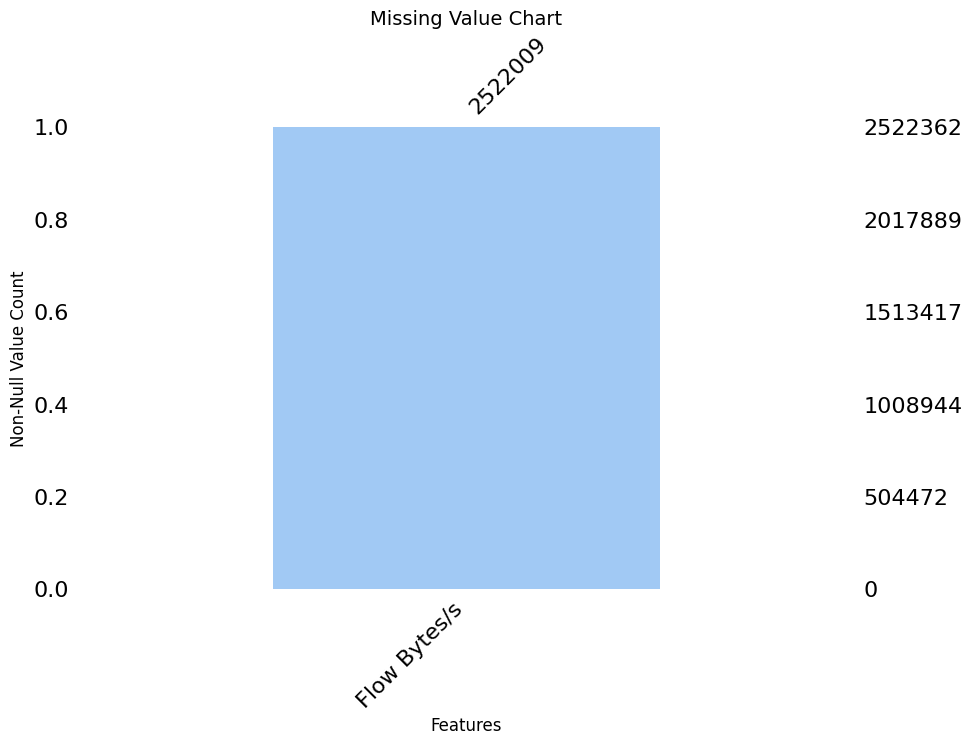

In [16]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('pastel')
colors = sns.color_palette()[0]  # Choose the first color from the pastel palette

# Identify columns with missing values
missing_vals = [col for col in df.columns if df[col].isna().any()]

# Plot missing value chart
fig, ax = plt.subplots(figsize=(10, 6))  # Wider figure for better readability
msno.bar(df[missing_vals], ax=ax, color=colors)
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Non-Null Value Count', fontsize=12)
ax.set_title('Missing Value Chart', fontsize=14)
plt.show()

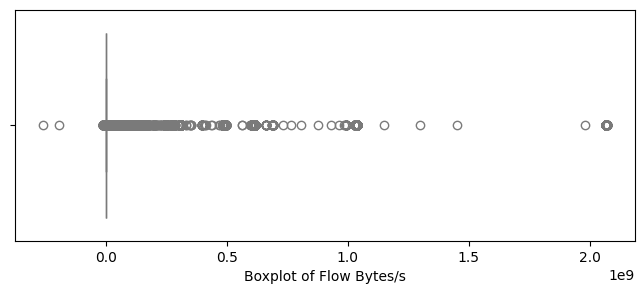

In [17]:
df = df.reset_index(drop=True)

# Now, create your box plot
plt.figure(figsize=(8, 3))
sns.boxplot(x=df['Flow Bytes/s'])
plt.xlabel('Boxplot of Flow Bytes/s')
plt.show()

In [18]:
med_flow_bytes = df['Flow Bytes/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)


Median of Flow Bytes/s:  3722.028051


In [19]:
df['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)

<ipython-input-19-aeb2800cc076>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)


In [20]:
print('Number of \'Flow Bytes/s\' missing values:', df['Flow Bytes/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0


In [21]:

df.describe().T

count          mean           std   min  \
 Destination Port            2522362.0  8.704762e+03  1.902507e+04   0.0   
 Flow Duration               2522362.0  1.658132e+07  3.522426e+07 -13.0   
 Total Fwd Packets           2522362.0  1.027627e+01  7.941738e+02   1.0   
 Total Backward Packets      2522362.0  1.156596e+01  1.056594e+03   0.0   
Total Length of Fwd Packets  2522362.0  6.115751e+02  1.058499e+04   0.0   
...                                ...           ...           ...   ...   
 Active Min                  2522362.0  6.542300e+04  6.109712e+05   0.0   
Idle Mean                    2522362.0  9.331578e+06  2.484157e+07   0.0   
 Idle Std                    2522362.0  5.654433e+05  4.872678e+06   0.0   
 Idle Max                    2522362.0  9.757716e+06  2.561067e+07   0.0   
 Idle Min                    2522362.0  8.887157e+06  2.457481e+07   0.0   

                               25%      50%         75%          max  
 Destination Port             53.0     80.0      443.00      65535.0  
 Flow Duration               208.0  50577.0  5329717.25  119999998.0  
 Total Fwd Packets             2.0      2.0        6.00     219759.0  
 Total Backward Packets        1.0      2.0        5.00     291922.0  
Total Length of Fwd Packets   12.0     66.0      332.00   12900000.0  
...                            ...      ...         ...          ...  
 Active Min                    0.0      0.0        0.00  110000000.0  
Idle Mean                      0.0      0.0        0.00  120000000.0  
 Idle Std                      0.0      0.0        0.00   76900000.0  
 Idle Max                      0.0      0.0        0.00  120000000.0  
 Idle Min                      0.0      0.0        0.00  120000000.0  

[78 rows x 8 columns]

In [22]:
df.describe(include='O').T

count unique     top     freq
Label  2522362     15  BENIGN  2096484

## Renaming the columns by removing leading/trailing whitespace

In [23]:
col_names = {col: col.strip() for col in df.columns}
df.rename(columns = col_names, inplace = True)

In [24]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [25]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
df.describe().transpose()

Overview of Columns:


count          mean           std  \
Destination Port             2522362.0  8.704762e+03  1.902507e+04   
Flow Duration                2522362.0  1.658132e+07  3.522426e+07   
Total Fwd Packets            2522362.0  1.027627e+01  7.941738e+02   
Total Backward Packets       2522362.0  1.156596e+01  1.056594e+03   
Total Length of Fwd Packets  2522362.0  6.115751e+02  1.058499e+04   
Total Length of Bwd Packets  2522362.0  1.813315e+04  2.397434e+06   
Fwd Packet Length Max        2522362.0  2.310918e+02  7.561625e+02   
Fwd Packet Length Min        2522362.0  1.919464e+01  6.079447e+01   
Fwd Packet Length Mean       2522362.0  6.347010e+01  1.955015e+02   
Fwd Packet Length Std        2522362.0  7.727759e+01  2.967953e+02   
Bwd Packet Length Max        2522362.0  9.743700e+02  2.037859e+03   
Bwd Packet Length Min        2522362.0  4.313467e+01  7.087022e+01   
Bwd Packet Length Mean       2522362.0  3.404133e+02  6.324238e+02   
Bwd Packet Length Std        2522362.0  3.763118e+02  8.808314e+02   
Flow Bytes/s                 2522362.0           inf           NaN   
Flow Packets/s               2522362.0           inf           NaN   
Flow IAT Mean                2522362.0  1.445246e+06  4.681883e+06   
Flow IAT Std                 2522362.0  3.276120e+06  8.454525e+06   
Flow IAT Max                 2522362.0  1.029310e+07  2.567868e+07   
Flow IAT Min                 2522362.0  1.703157e+05  3.013372e+06   
Fwd IAT Total                2522362.0  1.624176e+07  3.515781e+07   
Fwd IAT Mean                 2522362.0  2.917447e+06  1.001355e+07   
Fwd IAT Std                  2522362.0  3.666366e+06  1.013934e+07   
Fwd IAT Max                  2522362.0  1.013665e+07  2.575975e+07   
Fwd IAT Min                  2522362.0  1.134967e+06  9.056733e+06   
Bwd IAT Total                2522362.0  1.110336e+07  3.022113e+07   
Bwd IAT Mean                 2522362.0  2.026477e+06  9.390609e+06   
Bwd IAT Std                  2522362.0  1.667647e+06  6.628389e+06   
Bwd IAT Max                  2522362.0  5.257358e+06  1.809655e+07   
Bwd IAT Min                  2522362.0  1.085438e+06  8.794528e+06   
Fwd PSH Flags                2522362.0  4.873805e-02  2.153199e-01   
Bwd PSH Flags                2522362.0  0.000000e+00  0.000000e+00   
Fwd URG Flags                2522362.0  3.171630e-05  5.631635e-03   
Bwd URG Flags                2522362.0  0.000000e+00  0.000000e+00   
Fwd Header Length            2522362.0 -2.918210e+04  2.230271e+07   
Bwd Header Length            2522362.0 -2.553644e+03  1.538422e+06   
Fwd Packets/s                2522362.0  4.083435e+04  1.932083e+05   
Bwd Packets/s                2522362.0  6.509475e+03  3.813312e+04   
Min Packet Length            2522362.0  1.682349e+01  2.557873e+01   
Max Packet Length            2522362.0  1.063098e+03  2.121197e+03   
Packet Length Mean           2522362.0  1.905415e+02  3.182915e+02   
Packet Length Std            2522362.0  3.299988e+02  6.607343e+02   
Packet Length Variance       2522362.0  5.454386e+05  1.735993e+06   
FIN Flag Count               2522362.0  3.214685e-02  1.763900e-01   
SYN Flag Count               2522362.0  4.873805e-02  2.153199e-01   
RST Flag Count               2522362.0  2.719673e-04  1.648919e-02   
PSH Flag Count               2522362.0  2.975192e-01  4.571669e-01   
ACK Flag Count               2522362.0  3.121875e-01  4.633860e-01   
URG Flag Count               2522362.0  1.014276e-01  3.018941e-01   
CWE Flag Count               2522362.0  3.171630e-05  5.631635e-03   
ECE Flag Count               2522362.0  2.731567e-04  1.652520e-02   
Down/Up Ratio                2522362.0  7.003495e-01  6.955667e-01   
Average Packet Size          2522362.0  2.123115e+02  3.454353e+02   
Avg Fwd Segment Size         2522362.0  6.347010e+01  1.955015e+02   
Avg Bwd Segment Size         2522362.0  3.404133e+02  6.324238e+02   
Fwd Header Length.1          2522362.0 -2.918210e+04  2.230271e+07   
Fwd Avg Bytes/Bulk           2522362.0  0.0

In [26]:
pd.options.display.max_columns = 80
df

Destination Port  Flow Duration  Total Fwd Packets  \
0                   54865              3                  2   
1                   55054            109                  1   
2                   55055             52                  1   
3                   46236             34                  1   
4                   54863              3                  2   
...                   ...            ...                ...   
2522357                53          32215                  4   
2522358                53            324                  2   
2522359             58030             82                  2   
2522360                53        1048635                  6   
2522361                53          94939                  4   

         Total Backward Packets  Total Length of Fwd Packets  \
0                             0                           12   
1                             1                            6   
2                             1                            6   
3                             1                            6   
4                             0                           12   
...                         ...                          ...   
2522357                       2                          112   
2522358                       2                           84   
2522359                       1                           31   
2522360                       2                          192   
2522361                       2                          188   

         Total Length of Bwd Packets  Fwd Packet Length Max  \
0                                  0                      6   
1                                  6                      6   
2                                  6                      6   
3                                  6                      6   
4                                  0                      6   
...                              ...                    ...   
2522357                          152                     28   
2522358                          362                     42   
2522359                            6                     31   
2522360                          256                     32   
2522361                          226                     47   

         Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
0                            6                     6.0                0.00000   
1                            6                     6.0                0.00000   
2                            6                     6.0                0.00000   
3                            6                     6.0                0.00000   
4                            6                     6.0                0.00000   
...                        ...                     ...                    ...   
2522357                     28                    28.0                0.00000   
2522358                     42                    42.0                0.00000   
2522359                      0                    15.5               21.92031   
2522360                     32                    32.0                0.00000   
2522361                     47                    47.0                0.00000   

         Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
0                            0                      0                     0.0   
1                            6                      6                     6.0   
2                            6                      6                     6.0   
3                            6                      6                     6.0   
4                            0                      0                     0.0   
...                        ...                    ...                     ...   
2522357                     76                     76                    76.0   
2522358                    181                    181                   181.0   
2522359                 

#Analysing Patterns

In [27]:
df["Label"].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [28]:
df['Label'].value_counts()

Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [29]:
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}


df['Attack Type'] = df['Label'].map(attack_map)

In [30]:
df['Attack Type'].value_counts()

Attack Type
BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attack Number'] = le.fit_transform(df['Attack Type'])

print(df['Attack Number'].unique())

[0 3 7 1 6 8 2 4 5]


In [32]:
encoded_values = df['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: Web Attack


In [33]:
corr = df.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

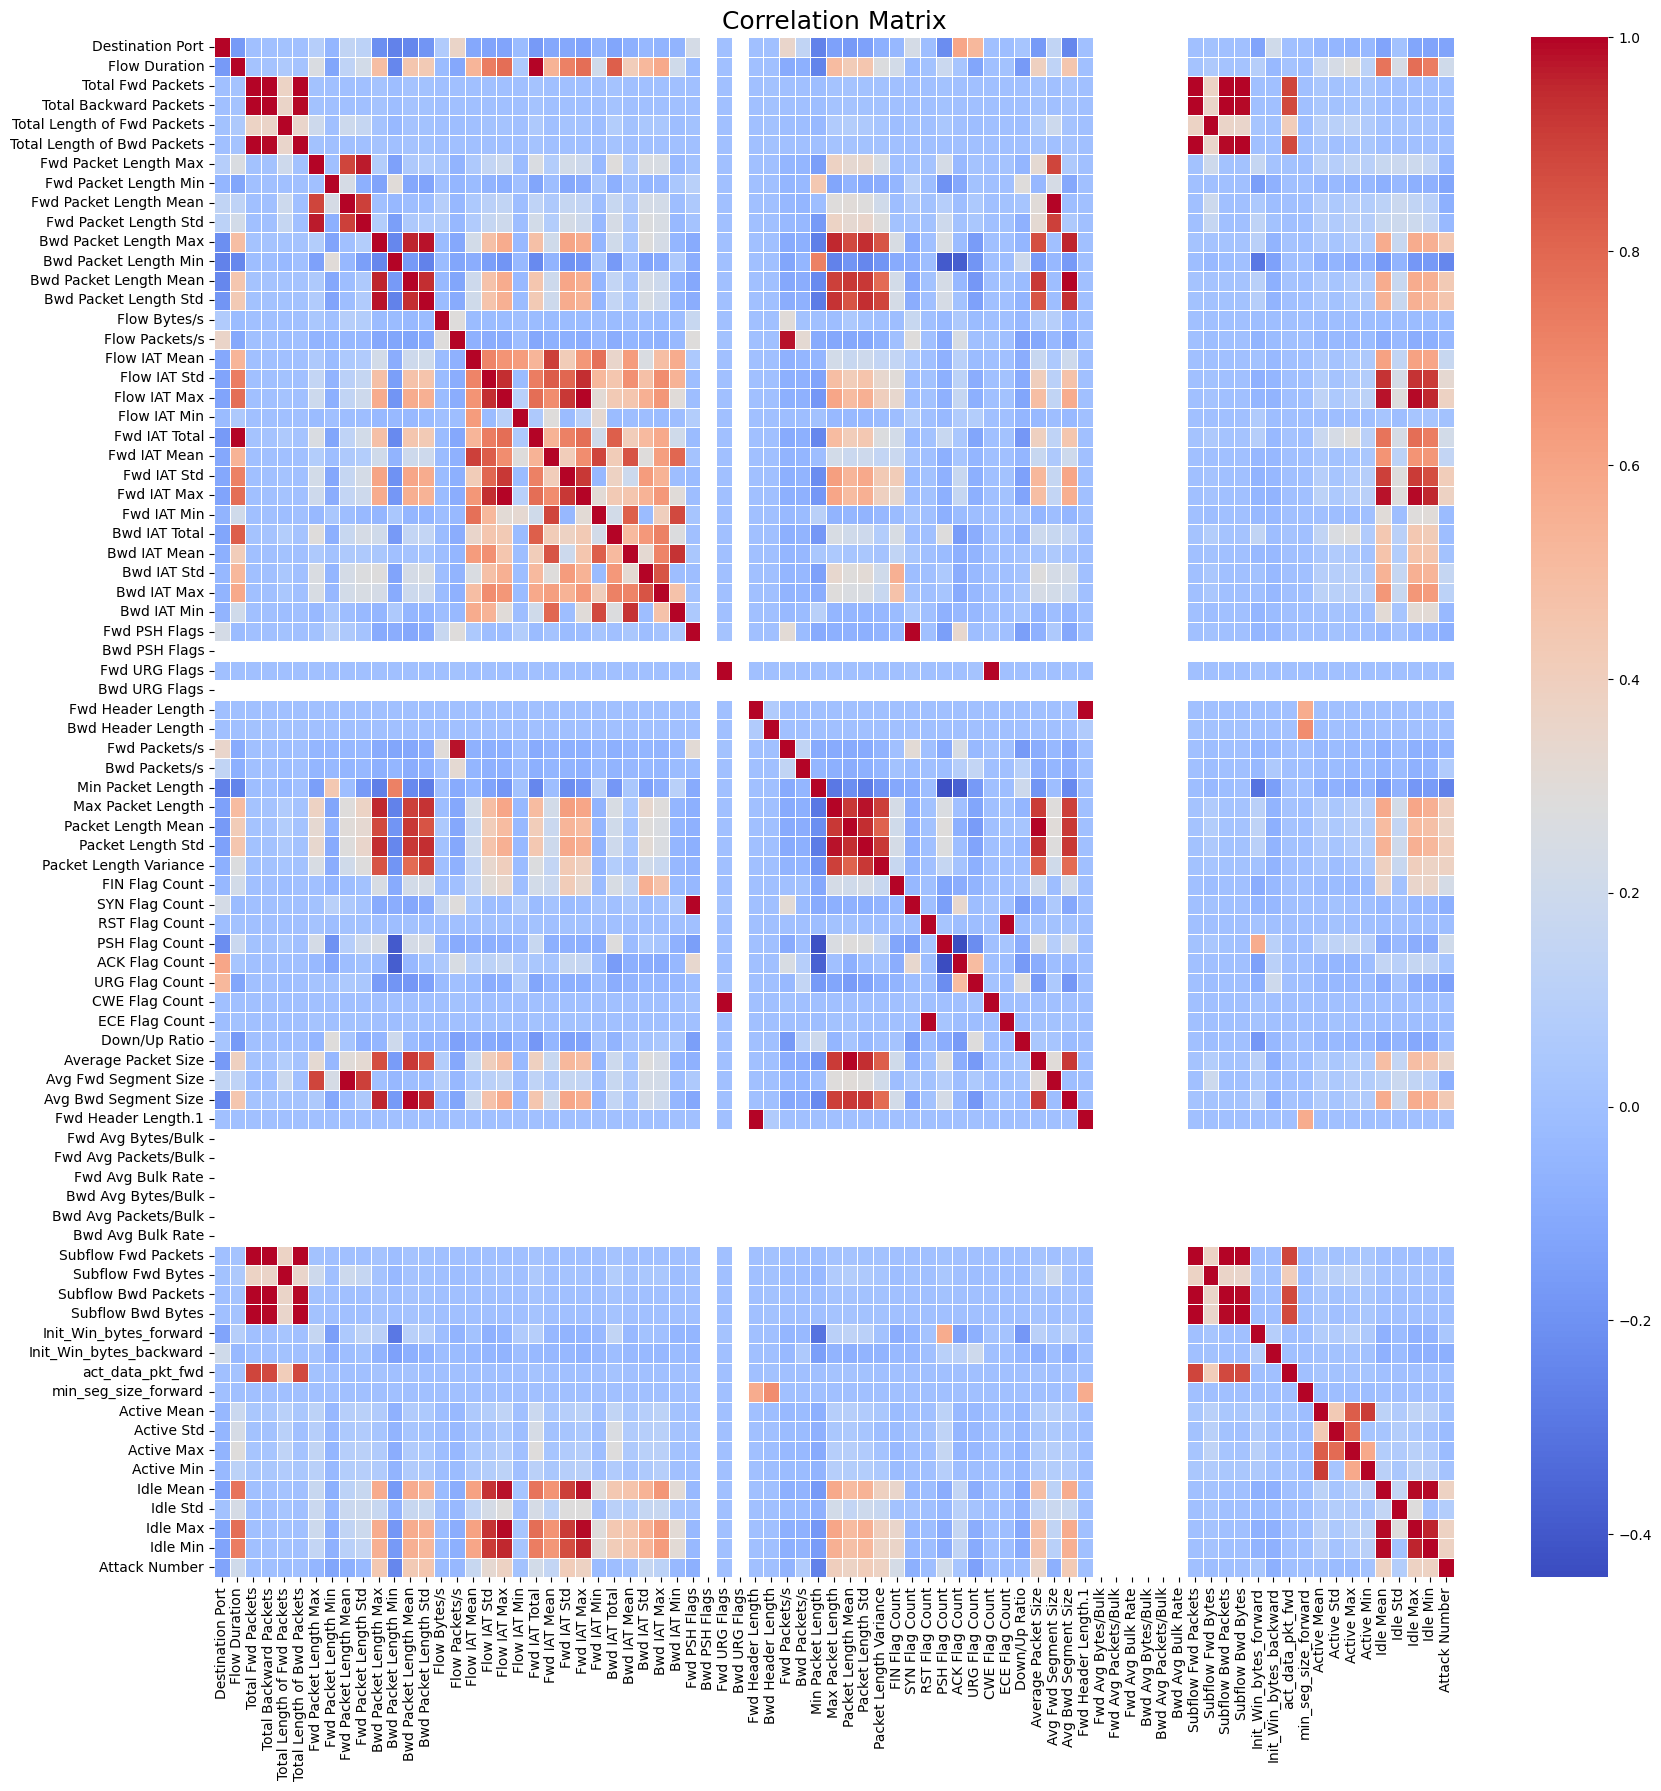

In [36]:
fig, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.6)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

# Positive correlation features for 'Attack Number'

In [39]:

pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("here shows that features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

here shows that features with positive correlation with 'Attack Number':

1.  Flow Duration            :0.21
2.  Bwd Packet Length Max    :0.44
3.  Bwd Packet Length Mean   :0.43
4.  Bwd Packet Length Std    :0.45
5.  Flow IAT Mean            :0.17
6.  Flow IAT Std             :0.33
7.  Flow IAT Max             :0.38
8.  Flow IAT Min             :0.01
9.  Fwd IAT Total            :0.22
10. Fwd IAT Mean             :0.15
11. Fwd IAT Std              :0.41
12. Fwd IAT Max              :0.38
13. Bwd IAT Mean             :0.01
14. Bwd IAT Std              :0.16
15. Bwd IAT Max              :0.12
16. Bwd Packets/s            :0.07
17. Max Packet Length        :0.4
18. Packet Length Mean       :0.37
19. Packet Length Std        :0.41
20. Packet Length Variance   :0.38
21. FIN Flag Count           :0.23
22. PSH Flag Count           :0.21
23. ACK Flag Count           :0.03
24. Average Packet Size      :0.36
25. Avg Bwd Segment Size     :0.43
26. Init_Win_bytes_forward   :0.04
27. Active Mean  

In [41]:
print(f'Show the Number of considerable important features: {len(pos_corr_features)}')

Show the Number of considerable important features: 32


In [43]:
std = df.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

#Visualization of Linear Relationships of columns Numerical Variables sampling

In [46]:
sample_size = int(0.2 * len(df))
sampled_data = df.sample(n = sample_size, replace = False, random_state = 0)
sampled_data.shape

(504472, 81)

#Descriptive Statistics Comparison (mean):


In [51]:
numeric_cols = df.select_dtypes(include = [np.number]).columns.tolist()
print('Descriptive Statistics Comparison (mean):\n')
print('{:<32s}{:<22s}{:<22s}{}'.format('Feature', 'Original Dataset', 'Sampled Dataset', 'Variation Percentage'))
print('-' * 96)

high_variations = []
for col in numeric_cols:
    old = df[col].describe()[1]
    new = sampled_data[col].describe()[1]
    if old == 0:
        pct = 0
    else:
        pct = abs((new - old) / old)
    if pct * 100 > 5:
        high_variations.append((col, pct * 100))
    print('{:<32s}{:<22.6f}{:<22.6f}{:<2.2%}'.format(col, old, new, pct))

Descriptive Statistics Comparison (mean):

Feature                         Original Dataset      Sampled Dataset       Variation Percentage
------------------------------------------------------------------------------------------------
Destination Port                8704.762165           8709.619693           0.06%
Flow Duration                   16581323.773163       16664541.182583       0.50%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Total Fwd Packets               10.276271             11.801783             14.84%
Total Backward Packets          11.565964             13.671102             18.20%
Total Length of Fwd Packets     611.575108            609.676051            0.31%


<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as pos

Total Length of Bwd Packets     18133.153930          22797.828210          25.72%
Fwd Packet Length Max           231.091768            233.184968            0.91%
Fwd Packet Length Min           19.194641             19.227202             0.17%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Fwd Packet Length Mean          63.470104             63.967652             0.78%
Fwd Packet Length Std           77.277587             78.211522             1.21%
Bwd Packet Length Max           974.370031            974.205314            0.02%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Bwd Packet Length Min           43.134670             43.136188             0.00%
Bwd Packet Length Mean          340.413252            340.147273            0.08%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Bwd Packet Length Std           376.311810            375.978616            0.09%
Flow Bytes/s                    inf                   inf                   nan%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:13: RuntimeWarning: invalid value encountered in scalar subtract
  pct = abs((new - old) / old)
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
 

Flow Packets/s                  inf                   inf                   nan%
Flow IAT Mean                   1445245.597645        1451209.758825        0.41%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Flow IAT Std                    3276120.003337        3285421.146530        0.28%
Flow IAT Max                    10293098.691924       10324990.025290       0.31%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Flow IAT Min                    170315.698627         172114.015073         1.06%
Fwd IAT Total                   16241759.007512       16323530.876360       0.50%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Fwd IAT Mean                    2917447.144105        2928333.466537        0.37%
Fwd IAT Std                     3666365.865689        3679891.360516        0.37%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Fwd IAT Max                     10136646.258398       10170595.389157       0.33%
Fwd IAT Min                     1134966.753752        1137825.624043        0.25%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Bwd IAT Total                   11103358.523806       11190684.197282       0.79%
Bwd IAT Mean                    2026476.920068        2033360.711983        0.34%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Bwd IAT Std                     1667646.690399        1682435.202259        0.89%
Bwd IAT Max                     5257357.549892        5296220.704721        0.74%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Bwd IAT Min                     1085437.767545        1084244.274313        0.11%
Fwd PSH Flags                   0.048738              0.048934              0.40%
Bwd PSH Flags                   0.000000              0.000000              0.00%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Fwd URG Flags                   0.000032              0.000030              6.25%
Bwd URG Flags                   0.000000              0.000000              0.00%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Fwd Header Length               -29182.101016         -25192.870607         13.67%
Bwd Header Length               -2553.643801          -182.492301           92.85%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Fwd Packets/s                   40834.353243          40668.105738          0.41%
Bwd Packets/s                   6509.474728           6463.699743           0.70%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Min Packet Length               16.823494             16.826422             0.02%
Max Packet Length               1063.097507           1064.619073           0.14%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Packet Length Mean              190.541501            190.652471            0.06%
Packet Length Std               329.998773            330.374342            0.11%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Packet Length Variance          545438.614758         545927.972449         0.09%
FIN Flag Count                  0.032147              0.032414              0.83%
SYN Flag Count                  0.048738              0.048934              0.40%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

RST Flag Count                  0.000272              0.000274              0.58%
PSH Flag Count                  0.297519              0.297293              0.08%
ACK Flag Count                  0.312188              0.312015              0.06%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

URG Flag Count                  0.101428              0.101001              0.42%
CWE Flag Count                  0.000032              0.000030              6.25%
ECE Flag Count                  0.000273              0.000278              1.60%
Down/Up Ratio                   0.700350              0.699559              0.11%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Average Packet Size             212.311468            212.389738            0.04%
Avg Fwd Segment Size            63.470104             63.967652             0.78%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Avg Bwd Segment Size            340.413252            340.147273            0.08%
Fwd Header Length.1             -29182.101016         -25192.870607         13.67%
Fwd Avg Bytes/Bulk              0.000000              0.000000              0.00%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Fwd Avg Packets/Bulk            0.000000              0.000000              0.00%
Fwd Avg Bulk Rate               0.000000              0.000000              0.00%
Bwd Avg Bytes/Bulk              0.000000              0.000000              0.00%
Bwd Avg Packets/Bulk            0.000000              0.000000              0.00%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Bwd Avg Bulk Rate               0.000000              0.000000              0.00%
Subflow Fwd Packets             10.276271             11.801783             14.84%
Subflow Fwd Bytes               611.563349            609.676051            0.31%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Subflow Bwd Packets             11.565964             13.671102             18.20%
Subflow Bwd Bytes               18132.772274          22797.595250          25.73%
Init_Win_bytes_forward          7265.655351           7260.537927           0.07%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Init_Win_bytes_backward         2230.826079           2250.854386           0.90%
act_data_pkt_fwd                6.005904              6.752303              12.43%
min_seg_size_forward            -3080.307029          -1869.751598          39.30%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Active Mean                     91521.689172          92486.524319          1.05%
Active Std                      46163.125326          46237.941638          0.16%
Active Max                      171910.435398         173586.180069         0.97%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

Active Min                      65422.995532          66368.983823          1.45%
Idle Mean                       9331577.511171        9358362.943227        0.29%
Idle Std                        565443.316197         573084.314017         1.35%
Idle Max                        9757716.419817        9790248.714614        0.33%
Idle Min                        8887156.719966        8907697.532571        0.23%
Attack Number                   0.726480              0.723656              0.39%


<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-51-a951b43278b1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = df[col].describe()[1]
<ipython-input-51-a951b43278b1>:9: FutureWarning: Series.__getitem__ treating keys as positions is 

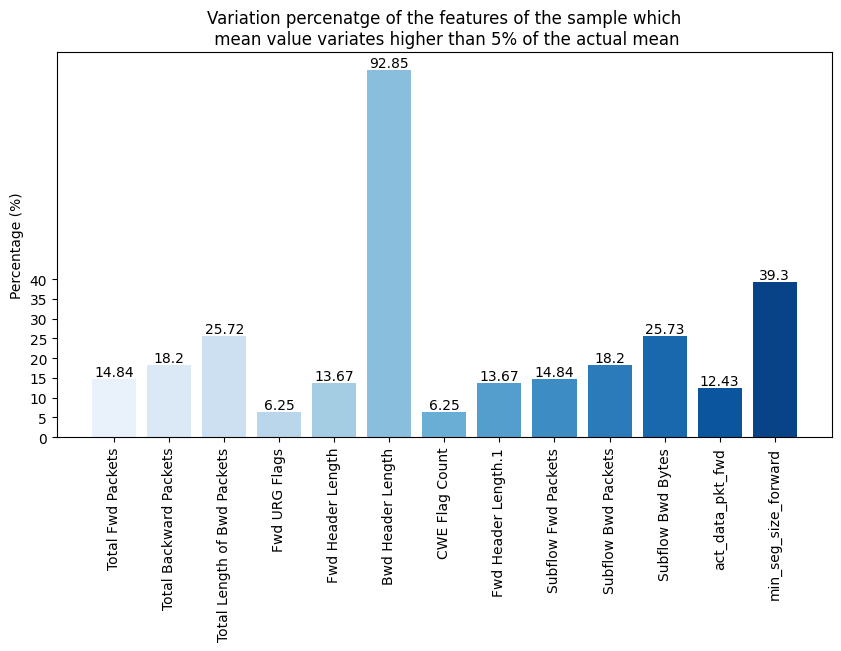

In [52]:

labels = [t[0] for t in high_variations]
values = [t[1] for t in high_variations]

colors = sns.color_palette('Blues', n_colors=len(labels))
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(labels, values, color = colors)

for i in range(len(labels)):
    ax.text(i, values[i], str(round(values[i], 2)), ha = 'center', va = 'bottom', fontsize = 10)

plt.xticks(rotation = 90)
ax.set_title('Variation percenatge of the features of the sample which\n mean value variates higher than 5% of the actual mean')
ax.set_ylabel('Percentage (%)')
ax.set_yticks(np.arange(0, 41, 5))
plt.show()

In [53]:
indent = '{:<3} {:<30}: {}'
print('Unique value count for: ')
for i, feature in enumerate(list(sampled_data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, sampled_data[feature].nunique()))

Unique value count for: 
1.  Destination Port              : 33264
2.  Flow Duration                 : 256319
3.  Total Fwd Packets             : 683
4.  Total Backward Packets        : 838
5.  Total Length of Fwd Packets   : 9099
6.  Total Length of Bwd Packets   : 24229
7.  Fwd Packet Length Max         : 3686
8.  Fwd Packet Length Min         : 242
9.  Fwd Packet Length Mean        : 35277
10. Fwd Packet Length Std         : 66362
11. Bwd Packet Length Max         : 3888
12. Bwd Packet Length Min         : 450
13. Bwd Packet Length Mean        : 45979
14. Bwd Packet Length Std         : 62866
15. Flow Bytes/s                  : 347115
16. Flow Packets/s                : 288254
17. Flow IAT Mean                 : 274064
18. Flow IAT Std                  : 229405
19. Flow IAT Max                  : 166881
20. Flow IAT Min                  : 45911
21. Fwd IAT Total                 : 119286
22. Fwd IAT Mean                  : 164137
23. Fwd IAT Std                   : 148396
24. Fwd IAT

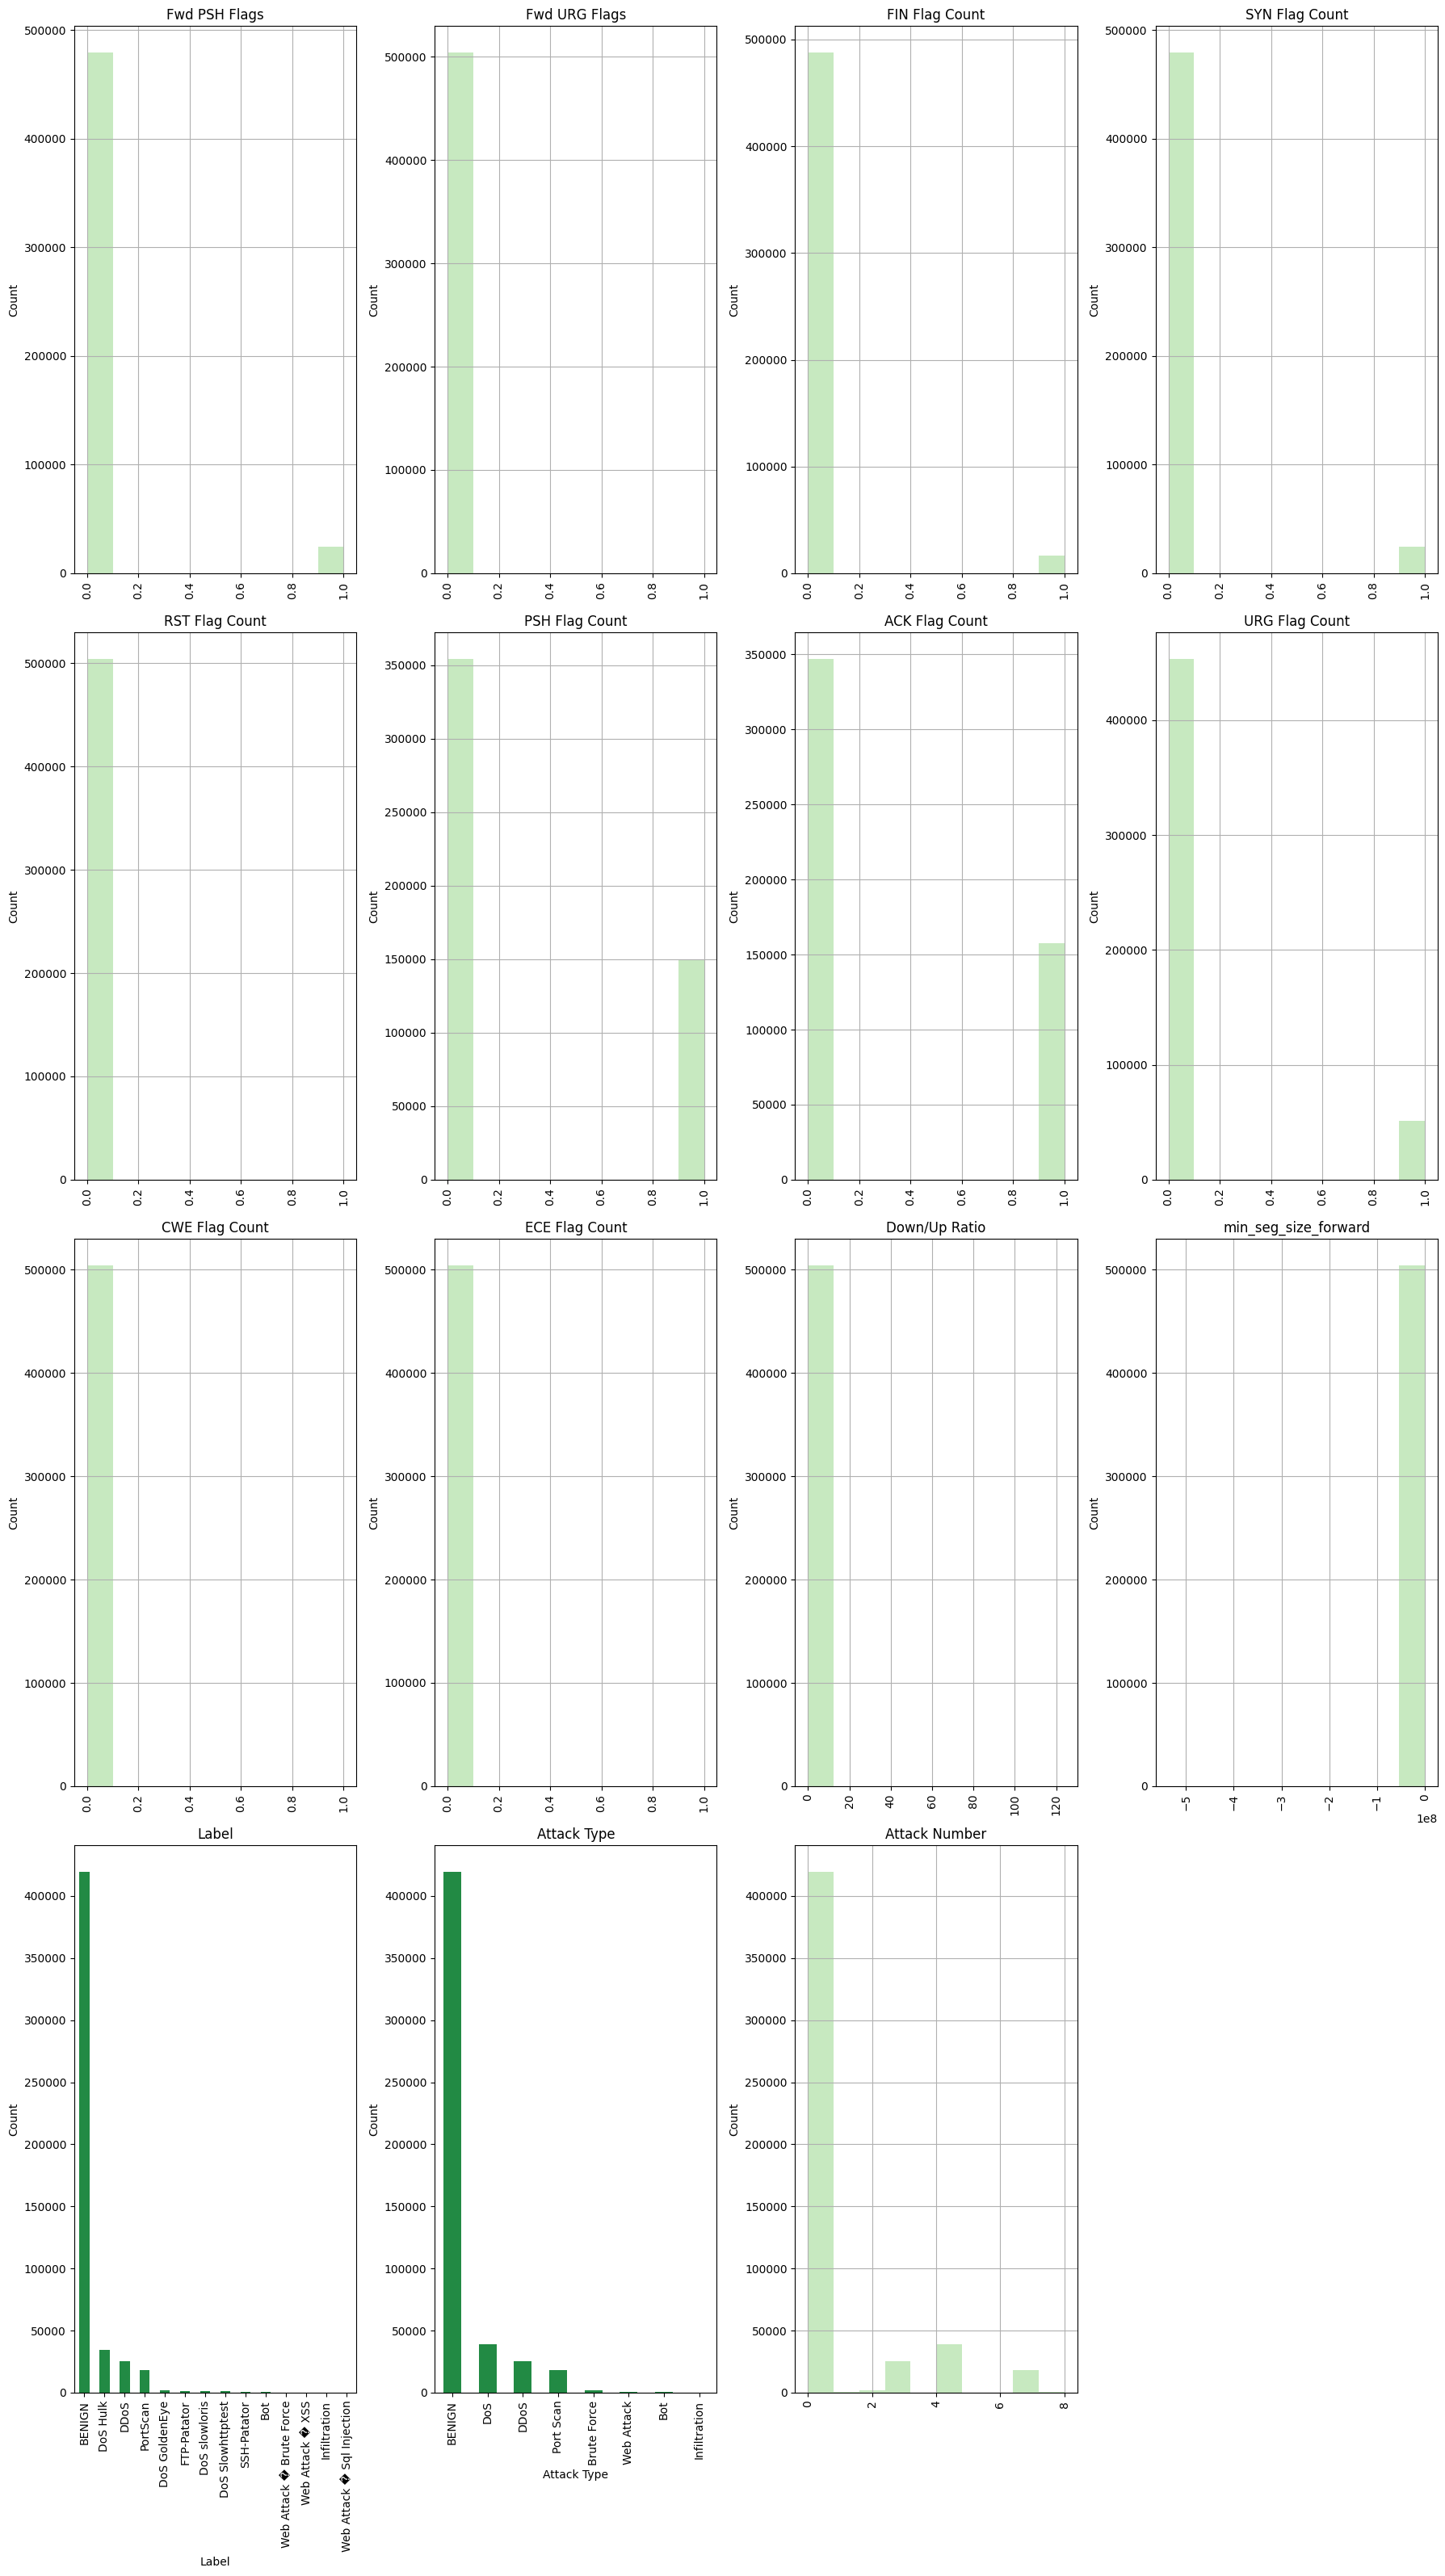

In [58]:
unique_values = sampled_data.nunique()
selected_cols = sampled_data[[col for col in sampled_data if 1 < unique_values[col] < 50]]
rows, cols = selected_cols.shape
col_names = list(selected_cols)
num_of_rows = (cols + 3) // 4

color_palette = sns.color_palette('Greens', n_colors = 3)
plt.figure(figsize = (6 * 3, 8 * num_of_rows))

for i in range(cols):
    plt.subplot(num_of_rows, 4, i + 1)
    col_data = selected_cols.iloc[:, i]
    if col_data.dtype.name == 'object':
        col_data.value_counts().plot(kind = 'bar', color = color_palette[2])
    else:
        col_data.hist(color = color_palette[0])

    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.title(col_names[i])

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


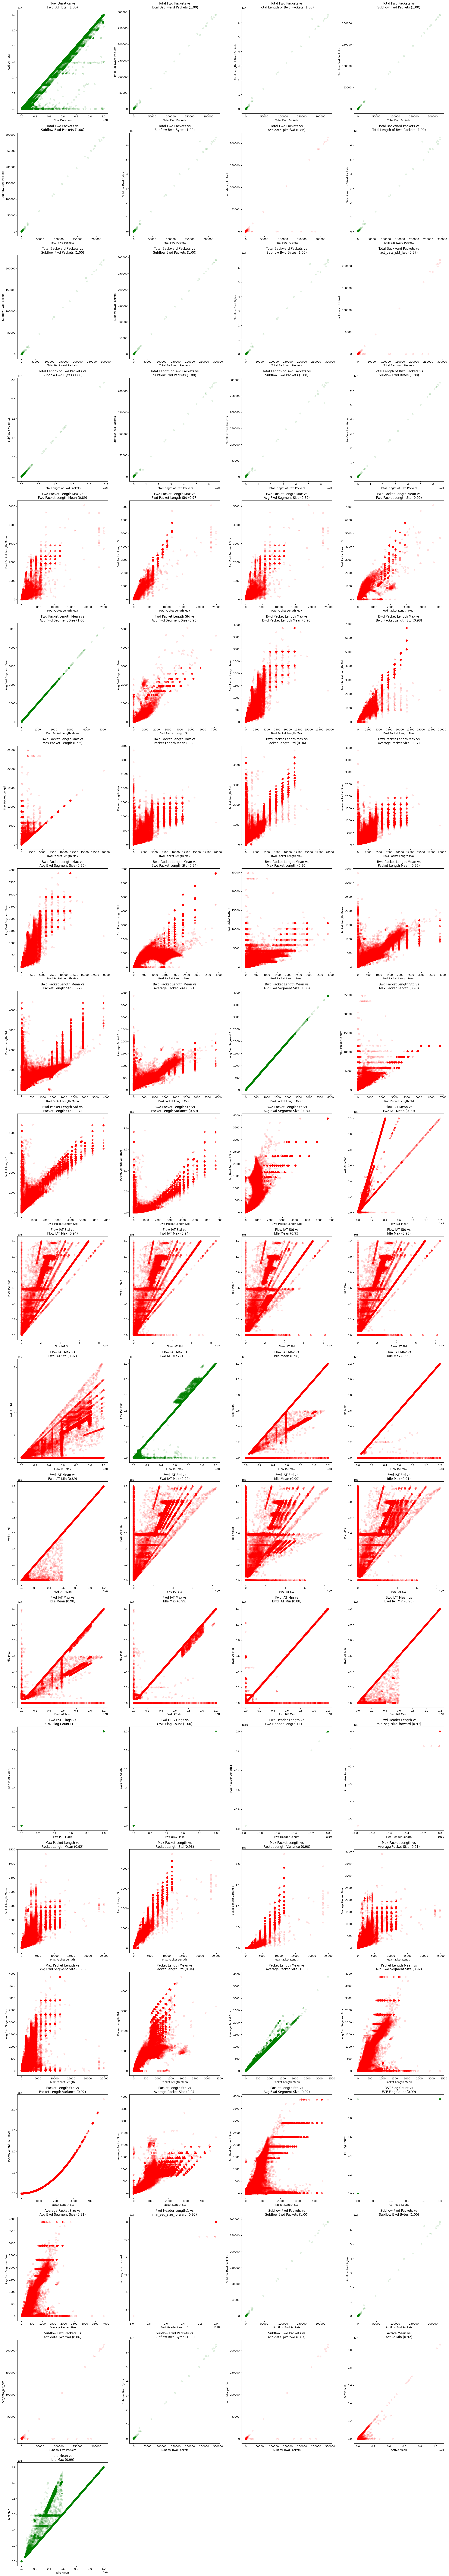

In [65]:
cols = list(sampled_data.select_dtypes(include=np.number).columns)[:-2]
high_corr_pairs = []
corr_th = 0.85

for i in range(len(cols)):
  for j in range(i + 1, len(cols)):
    val = sampled_data[cols[i]].corr(sampled_data[cols[j]])

    if np.isnan(val) or val < corr_th:
      continue
    high_corr_pairs.append((val, cols[i], cols[j]))

size, cols_num = len(high_corr_pairs), 4 # Rename cols to cols_num to avoid shadowing outer variable
rows, rem =  size // cols_num, size % cols_num
if rem:
  rows += 1

fig, axs = plt.subplots(rows, cols_num, figsize = (24, int(size * 1.7))) # Use cols_num instead of cols
for i in range(rows):
    for j in range(cols_num):
      try:
        val, x, y = high_corr_pairs[i * cols_num + j]
        if val > 0.99:
          axs[i, j].scatter(sampled_data[x], sampled_data[y], color = 'green', alpha = 0.1)
        else:
          axs[i, j].scatter(sampled_data[x], sampled_data[y], color = 'red', alpha = 0.1)
        axs[i, j].set_xlabel(x)
        axs[i, j].set_ylabel(y)
        axs[i, j].set_title(f'{x} vs\n{y} ({val:.2f})')
      except IndexError:
        fig.delaxes(axs[i, j])

fig.tight_layout()
plt.show()

In [66]:
# Identifying outliers
numeric_data = sampled_data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print(outlier_stats)

                             Outlier Count  Outlier Percentage
Destination Port                    109264               21.66
Flow Duration                        94059               18.65
Total Fwd Packets                    50548               10.02
Total Backward Packets               47917                9.50
Total Length of Fwd Packets          62997               12.49
Total Length of Bwd Packets         114946               22.79
Fwd Packet Length Max                48745                9.66
Fwd Packet Length Min                 2611                0.52
Fwd Packet Length Mean               35787                7.09
Fwd Packet Length Std                47276                9.37
Bwd Packet Length Max                75002               14.87
Bwd Packet Length Min                13507                2.68
Bwd Packet Length Mean               87556               17.36
Bwd Packet Length Std                89801               17.80
Flow Bytes/s                         95083             

## Identifying outliers based on attack type

In [67]:

outlier_counts = {}
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        attack_data = sampled_data[i][sampled_data['Attack Type'] == attack_type]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
        outlier_percent = num_outliers / len(attack_data) * 100
        outlier_counts[(i, attack_type)] = (num_outliers, outlier_percent)

for i in numeric_data:
  print(f'Feature: {i}')
  for attack_type in sampled_data['Attack Type'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
    print(f'- {attack_type}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

Feature: Destination Port
- BENIGN: 93837 (22.36%)
- DoS: 0 (0.00%)
- DDoS: 0 (0.00%)
- Port Scan: 2209 (12.25%)
- Brute Force: 0 (0.00%)
- Bot: 0 (0.00%)
- Web Attack: 0 (0.00%)
- Infiltration: 0 (0.00%)

Feature: Flow Duration
- BENIGN: 97520 (23.24%)
- DoS: 8490 (21.85%)
- DDoS: 4318 (17.01%)
- Port Scan: 389 (2.16%)
- Brute Force: 426 (24.41%)
- Bot: 86 (22.57%)
- Web Attack: 60 (14.32%)
- Infiltration: 0 (0.00%)

Feature: Total Fwd Packets
- BENIGN: 78213 (18.64%)
- DoS: 489 (1.26%)
- DDoS: 816 (3.21%)
- Port Scan: 280 (1.55%)
- Brute Force: 0 (0.00%)
- Bot: 8 (2.10%)
- Web Attack: 60 (14.32%)
- Infiltration: 1 (10.00%)

Feature: Total Backward Packets
- BENIGN: 60289 (14.37%)
- DoS: 4517 (11.62%)
- DDoS: 0 (0.00%)
- Port Scan: 97 (0.54%)
- Brute Force: 0 (0.00%)
- Bot: 8 (2.10%)
- Web Attack: 37 (8.83%)
- Infiltration: 1 (10.00%)

Feature: Total Length of Fwd Packets
- BENIGN: 80572 (19.20%)
- DoS: 10164 (26.16%)
- DDoS: 4610 (18.16%)
- Port Scan: 118 (0.65%)
- Brute Force: 0 (0.

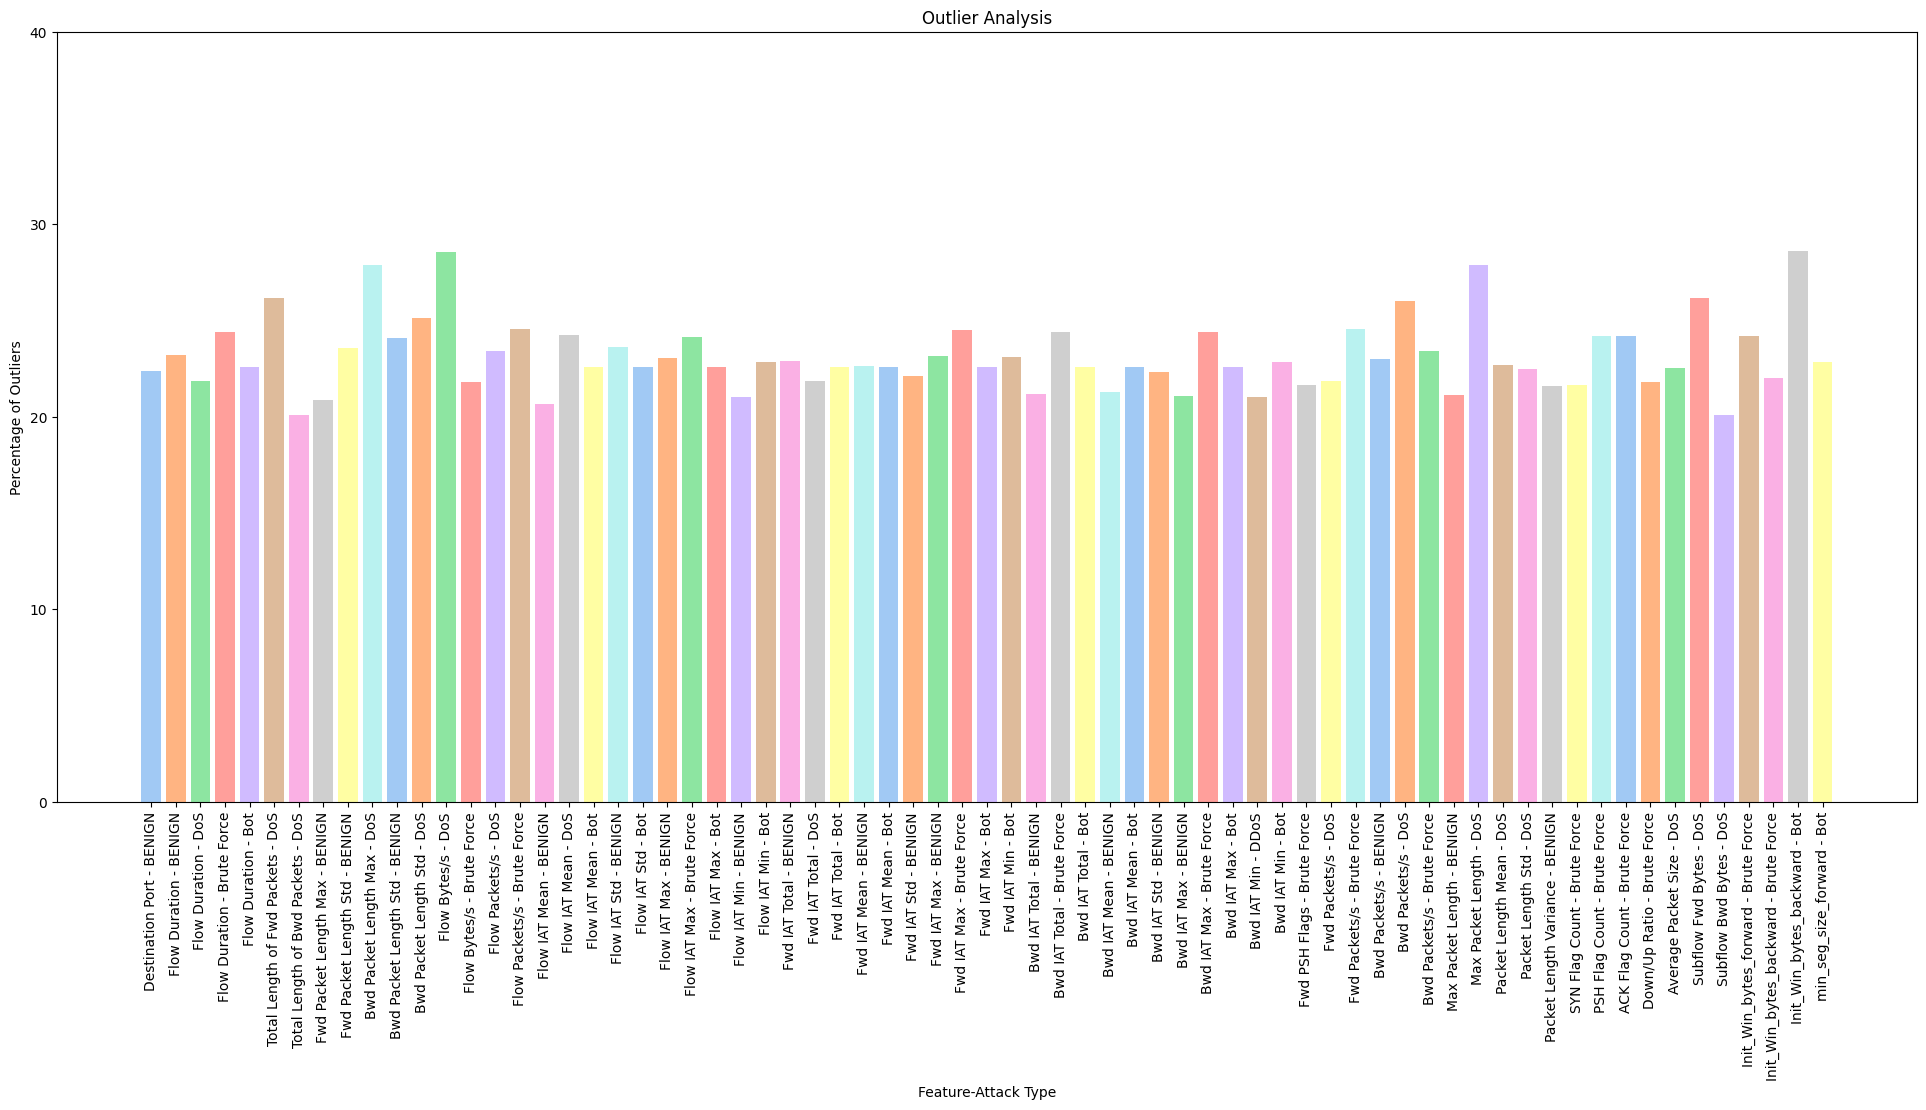

In [68]:
# Plotting the percentage of outliers that are higher than 20%
fig, ax = plt.subplots(figsize = (24, 10))
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
        if outlier_percent > 20:
            ax.bar(f'{i} - {attack_type}', outlier_percent)

ax.set_xlabel('Feature-Attack Type')
ax.set_ylabel('Percentage of Outliers')
ax.set_title('Outlier Analysis')
ax.set_yticks(np.arange(0, 41, 10))
plt.xticks(rotation = 90)
plt.show()